In [33]:
# imports
from sklearn.cross_decomposition import PLSRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# load data
train = np.genfromtxt('./mnist_train_100.csv', delimiter=',')
test = np.genfromtxt('./mnist_test_100.csv', delimiter=',')

In [5]:
# split data
X_train = train[:, 1:]+np.random.randn(100, 784)*50
y_train = train[:, 0].reshape((X_train.shape[0], 1)).astype(np.int)

X_test = test[:, 1:]
y_test = test[:, 0].reshape((X_test.shape[0], 1)).astype(np.int)

In [6]:
# function for visualization
def ShowMNISTObservation(X_data, y_data, obsNb=0):
    plt.clf()
    plt.imshow(X_data[obsNb, :].reshape((28, 28)), cmap='Greys')
    plt.title('Observation '+str(obsNb)+': Label '+str((y_data[obsNb, 0])))
    plt.colorbar()
    plt.show()

# Question 1

1. chaque ligne de` X_data` représente l'image d'un chiffre
2. `y_data` représente le label du chiffre

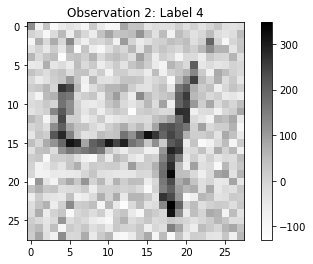

In [9]:
# image of the 4-th observation
ShowMNISTObservation(
    X_train,
    y_train,
    obsNb=2
)

# Question 2

1. le nombre de total d'observation : 100 + 100 = 200
la dimension est 784
2. le nombre de classe possible est 10
3. Oui, car la donnée et très grand dimension comparé au nombre de donnée

In [11]:
# shape of data
print(X_train.shape)
print(X_test.shape)

(100, 784)
(100, 784)


In [12]:
# possible labels
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Question 3

On trouve:
- la moyenne d'accuracy est: 0.46
- l'écart type est: 0.023

In [16]:
from sklearn.metrics import accuracy_score


# params
nb_train_times = 50
arr_accuracy = []

# train and test model 50 times
for i in range(nb_train_times):
    # init tree
    tree_classifier = DecisionTreeClassifier(
        max_depth=10,
    )

    # train the classfier
    tree_classifier.fit(
        X_train,
        y_train
    )

    # predit and measure accuracy
    y_predicted = tree_classifier.predict(X_test)
    accuracy = accuracy_score(
        y_test,
        y_predicted
    )

    # store accuracy
    arr_accuracy.append(accuracy)


In [17]:
arr_accuracy = np.array(
    arr_accuracy, 
    dtype=float
)

print(arr_accuracy.mean())
print(arr_accuracy.std())

0.46379999999999993
0.023570320320267176


# Question 4

En utilisant PCA en gardant 20 components, on arrive à préserver 0.42 de l'information

In [49]:
from sklearn.pipeline import make_pipeline

# pipeline of dimension reduction
reduce_data_pipeline = make_pipeline(
    # scale data
    StandardScaler(),
    # perform pca
    PCA(n_components=20)
)

reduce_data_pipeline.fit(X_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=20))])

In [34]:
reduce_data_pipeline["pca"].explained_variance_ratio_.sum()

0.41735038196738533

# Question 5

1. Préserver 20 components ne me semble pas approprié (presque 50% de l'information est perdu) surtout pour des modèles complexe (neural networks).

Sinon, si on veut utiliser juste des modèles basique (e.g. decision tree), à ce moment on peut accepter cette réduction de dimension.

2. le vecteur propre 1 permet de distinguer le chiffre 0.

In [35]:
import plotly.graph_objects as go


explained_var_ratio = reduce_data_pipeline["pca"].explained_variance_ratio_

# plot
fig = go.Figure(
    data=[
        go.Scatter(
            y=explained_var_ratio,
            mode="markers+lines"
        )
    ]
)

# adjust layout
fig.update_layout(
    title="Explained variance ratio",
    xaxis_title="eigen values"
)

fig.show()

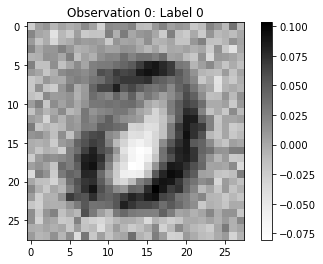

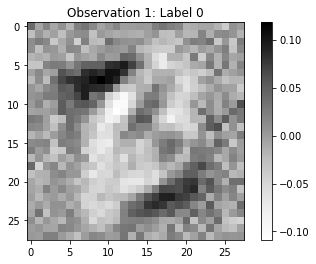

In [42]:
components = reduce_data_pipeline["pca"].components_

# first eigen vector
ShowMNISTObservation(
    components,
    np.array([[0] for i in range(20)]),
    obsNb=0
)

# second eigen vector
ShowMNISTObservation(
    components,
    np.array([[0] for i in range(20)]),
    obsNb=1
)

# Question 6 

- l'accuracy obtenue est 0.53 avec un écart type de 0.0209.
- la réduction de dimension a eu un effet bénéfique sur la prédiction. En effet, on a amélioré l'accuracy de 0.46 vers 0.53 tout en gradant le même écart type.

In [50]:
# project data
X_train_projected = reduce_data_pipeline.transform(X_train)
X_test_projected = reduce_data_pipeline.transform(X_test)

arr_accuracy_project = []
# train and test model 50 times
for i in range(nb_train_times):
    # init tree
    tree_classifier = DecisionTreeClassifier(
        max_depth=10,
    )

    # train the classfier
    tree_classifier.fit(
        X_train_projected,
        y_train
    )

    # predit and measure accuracy
    y_predicted = tree_classifier.predict(X_test_projected)
    accuracy = accuracy_score(
        y_test,
        y_predicted
    )

    # store accuracy
    arr_accuracy_project.append(accuracy)


In [51]:
arr_accuracy_project = np.array(
    arr_accuracy_project, 
    dtype=float
)

print(arr_accuracy_project.mean())
print(arr_accuracy_project.std())

0.5319999999999999
0.02097617696340305


# Question 7

- LDA effectue une projection supervisée des données dans le sens ou il prend en compte que les images sont liée aux labels

- ce résultat me semble satisfaisant car en calculant l'accuracy en utilisant LDA, on trouve 0.67 qui est une amélioration notable de l'accuracy obtenu préalablement (0.53)

In [71]:
# init LDA pipeline 
reduce_data_LDA = make_pipeline(
    StandardScaler(),
    # LDA with 20 components
    LinearDiscriminantAnalysis(n_components=9)
)

# fit on train samples
reduce_data_LDA.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lineardiscriminantanalysis',
                 LinearDiscriminantAnalysis(n_components=9))])

In [65]:
import plotly.graph_objects as go


explained_var_ratio_LDA = reduce_data_LDA["lineardiscriminantanalysis"].explained_variance_ratio_

# plot
fig = go.Figure(
    data=[
        go.Scatter(
            y=explained_var_ratio_LDA,
            mode="markers+lines"
        )
    ]
)

# adjust layout
fig.update_layout(
    title="Explained variance ratio",
    xaxis_title="eigen values"
)

fig.show()

In [66]:
explained_var_ratio_LDA.sum()

1.0

In [72]:
reduce_data_LDA.score(X_test, y_test)

0.67

# Question 8

- PLS n'est pas naturel car la varaible target est une varaible catégorique qui prennent des valueur 0, 1, 2, ..., et donc c'est comme si on définit sur ces classes une relation d'ordre (qui n'est pas valide)

- On transform y_train en une variable en $\{0, 1\}^9$

In [79]:
# perform onehot encoding on y_train
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

y_train = y_train.reshape((100, 1))

In [85]:
enc.fit_transform(y_train).toarray()

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 

In [86]:
from sklearn.cross_decomposition import PLSRegression

pls = PLSRegression(n_components=20)
pls.fit(X_train, y_train)


PLSRegression(n_components=20)